In [3]:
import cv2
import mediapipe as mp

In [75]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

# Video

## OG Video and Lines

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Process the video file.
def process_video(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Render the landmarks on the frame.
            frame.flags.writeable = True
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            out.write(frame)

    cap.release()
    out.release()


In [63]:

# Process the video file.
def process_video(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    # Define the columns for the DataFrame
    columns = ['video_frame']
    for landmark in mp.solutions.pose.PoseLandmark:
        columns.extend([
            f'{landmark.name}_x',
            f'{landmark.name}_y',
            f'{landmark.name}_z',
            f'{landmark.name}_visibility',
        ])
    features_df = pd.DataFrame(columns=columns)

    frame_count = 0
    with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Render the landmarks on the frame.
            frame.flags.writeable = True
            if results.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)

                # Extract all landmarks
                features = [frame_count]
                for landmark in results.pose_landmarks.landmark:
                    features.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])

                # Append the features to the DataFrame
                features_df.loc[frame_count] = features

            out.write(frame)
            frame_count += 1

    cap.release()
    out.release()

    # Save features to CSV
    # Assuming you have the landmarks available as pandas DataFrame
    features_df['HEAD_x'] = (features_df['LEFT_EAR_x'] + features_df['RIGHT_EAR_x']) / 2
    features_df['HEAD_y'] = (features_df['LEFT_EAR_y'] + features_df['RIGHT_EAR_y']) / 2
    features_df['HEAD_z'] = (features_df['LEFT_EAR_z'] + features_df['RIGHT_EAR_z']) / 2
    features_df.to_csv('features.csv', index=False)


In [64]:
filename = "IMG_3323.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/OG_LINES_video_{filename}"

process_video(input_video, output_video)


In [65]:
df = pd.read_csv('features.csv')

In [66]:
df.head()

,video_frame,NOSE_x,NOSE_y,NOSE_z,NOSE_visibility,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visibility,LEFT_EYE_x,...,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_visibility,HEAD_x,HEAD_y,HEAD_z
0,0.0,0.539855,0.213573,-0.023390,0.992504,0.533036,0.199423,-0.008216,0.992359,0.532018,...,0.980959,0.124515,0.303583,0.434164,0.992449,-0.136929,0.807182,0.519860,0.212224,-0.026436
1,1.0,0.532902,0.213329,-0.023402,0.992570,0.526234,0.200269,-0.008077,0.992325,0.525589,...,0.981274,0.124773,0.313106,0.438190,0.994187,-0.148927,0.812828,0.515960,0.215590,-0.021966
2,2.0,0.530617,0.210365,-0.026477,0.993052,0.524396,0.199009,-0.010271,0.992821,0.523864,...,0.986890,0.111801,0.322196,0.451566,0.995677,-0.147194,0.814276,0.513534,0.215314,-0.022481
3,3.0,0.528195,0.208636,-0.027476,0.993306,0.520921,0.197804,-0.010961,0.993090,0.520394,...,0.994019,0.112279,0.325879,0.456053,1.000467,-0.144336,0.810476,0.508876,0.215195,-0.022997
4,4.0,0.526285,0.208912,-0.026819,0.993648,0.518417,0.198165,-0.010492,0.993457,0.517767,...,0.998276,0.113506,0.328340,0.460829,1.035332,-0.137345,0.804657,0.505240,0.216238,-0.021699


In [67]:
df.tail()

,video_frame,NOSE_x,NOSE_y,NOSE_z,NOSE_visibility,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visibility,LEFT_EYE_x,...,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_visibility,HEAD_x,HEAD_y,HEAD_z
1326,1326.0,0.526654,0.367753,-0.046682,0.993442,0.519250,0.357209,-0.034504,0.993238,0.518364,...,1.128684,0.139453,0.191787,0.491615,1.145204,-0.139544,0.618748,0.505619,0.375293,-0.049501
1327,1327.0,0.529331,0.367413,-0.046216,0.993620,0.521329,0.356238,-0.034750,0.993474,0.520241,...,1.116120,0.157156,0.191006,0.489736,1.138915,-0.135233,0.620428,0.506648,0.373331,-0.050106
1328,1328.0,0.529149,0.364901,-0.047434,0.993691,0.521319,0.352832,-0.036634,0.993602,0.520231,...,1.092006,0.183411,0.200156,0.485542,1.103358,-0.090438,0.629335,0.506637,0.369227,-0.051610
1329,1329.0,0.529198,0.361261,-0.048767,0.993703,0.521491,0.349209,-0.038272,0.993654,0.520371,...,1.085914,0.179930,0.200937,0.477811,1.101228,-0.088418,0.629825,0.506709,0.366340,-0.053013
1330,1330.0,0.527229,0.357995,-0.049394,0.993958,0.519461,0.346970,-0.038271,0.993912,0.518345,...,1.091235,0.168577,0.207195,0.475986,1.113825,-0.099299,0.635704,0.505332,0.364926,-0.052164


In [68]:
def calculate_angle(point_a, point_b, point_c):
    # Convert the points to numpy arrays
    point_a = np.array(point_a)
    point_b = np.array(point_b)
    point_c = np.array(point_c)

    # Calculate the vectors
    vector_ab = point_b - point_a
    vector_bc = point_c - point_b

    # Normalize the vectors
    vector_ab = vector_ab / np.linalg.norm(vector_ab)
    vector_bc = vector_bc / np.linalg.norm(vector_bc)

    # Calculate the cosine of the angle
    cos_angle = np.dot(vector_ab, vector_bc)

    # Calculate the angle itself
    angle = np.arccos(cos_angle)

    # Convert to degrees
    angle_degrees = np.degrees(angle)

    return angle_degrees


In [52]:
# Function to extract angles for a row
def extract_angles(row):
    midpoint_knee = (row[['LEFT_KNEE_x', 'LEFT_KNEE_y', 'LEFT_KNEE_z']] + row[['RIGHT_KNEE_x', 'RIGHT_KNEE_y', 'RIGHT_KNEE_z']]) / 2
    thorax = (row[['LEFT_SHOULDER_x', 'LEFT_SHOULDER_y', 'LEFT_SHOULDER_z']] + row[['RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y', 'RIGHT_SHOULDER_z']]) / 2

    # Define the angles
    angles = {
        "left_shoulder": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['LEFT_SHOULDER_x', 'LEFT_SHOULDER_y', 'LEFT_SHOULDER_z']], row[['LEFT_ELBOW_x', 'LEFT_ELBOW_y', 'LEFT_ELBOW_z']]],
        "right_shoulder": [row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], row[['RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y', 'RIGHT_SHOULDER_z']], row[['RIGHT_ELBOW_x', 'RIGHT_ELBOW_y', 'RIGHT_ELBOW_z']]],
        "left_elbow": [row[['LEFT_SHOULDER_x', 'LEFT_SHOULDER_y', 'LEFT_SHOULDER_z']], row[['LEFT_ELBOW_x', 'LEFT_ELBOW_y', 'LEFT_ELBOW_z']], row[['LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_WRIST_z']]],
        "right_elbow": [row[['RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y', 'RIGHT_SHOULDER_z']], row[['RIGHT_ELBOW_x', 'RIGHT_ELBOW_y', 'RIGHT_ELBOW_z']], row[['RIGHT_WRIST_x', 'RIGHT_WRIST_y', 'RIGHT_WRIST_z']]],
        "left_hip": [row[['LEFT_KNEE_x', 'LEFT_KNEE_y', 'LEFT_KNEE_z']], row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['LEFT_SHOULDER_x', 'LEFT_SHOULDER_y', 'LEFT_SHOULDER_z']]],
        "right_hip": [row[['RIGHT_KNEE_x', 'RIGHT_KNEE_y', 'RIGHT_KNEE_z']], row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], row[['RIGHT_SHOULDER_x', 'RIGHT_SHOULDER_y', 'RIGHT_SHOULDER_z']]],
        "left_knee": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['LEFT_KNEE_x', 'LEFT_KNEE_y', 'LEFT_KNEE_z']], row[['LEFT_ANKLE_x', 'LEFT_ANKLE_y', 'LEFT_ANKLE_z']]],
        "right_knee": [row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], row[['RIGHT_KNEE_x', 'RIGHT_KNEE_y', 'RIGHT_KNEE_z']], row[['RIGHT_ANKLE_x', 'RIGHT_ANKLE_y', 'RIGHT_ANKLE_z']]],
        "lower_spine": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], thorax],
        "middle_spine": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], thorax, row[['NECK_x', 'NECK_y', 'NECK_z']]],
        "upper_spine": [thorax, row[['NECK_x', 'NECK_y', 'NECK_z']], row[['HEAD_x', 'HEAD_y', 'HEAD_z']]],
        "torso": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], row[['NECK_x', 'NECK_y', 'NECK_z']]],
        "pelvis": [row[['LEFT_HIP_x', 'LEFT_HIP_y', 'LEFT_HIP_z']], row[['RIGHT_HIP_x', 'RIGHT_HIP_y', 'RIGHT_HIP_z']], midpoint_knee],
    }

    # Calculate the angles
    for angle_name, points in angles.items():
        angle = calculate_angle(*points)
        row[angle_name] = angle

    return row




In [90]:
import math

In [91]:
def calculate_angle(landmark_a, landmark_b, landmark_c):
    # Extract coordinates
    x_a, y_a = landmark_a.x, landmark_a.y
    x_b, y_b = landmark_b.x, landmark_b.y
    x_c, y_c = landmark_c.x, landmark_c.y
    # Calculate the vectors
    vector_ab = [x_b - x_a, y_b - y_a]
    vector_bc = [x_c - x_b, y_c - y_b]
    # Calculate the angle using dot product and arccosine
    angle = math.acos(np.dot(vector_ab, vector_bc) / (np.linalg.norm(vector_ab) * np.linalg.norm(vector_bc)))
    return np.degrees(angle)


In [96]:
def calculate_2d_angle(a, b, c):
    a = np.array([a[0], a[1]])
    b = np.array([b[0], b[1]])
    c = np.array([c[0], c[1]])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


In [92]:
def extract_angles(row):
    angles = {}

    # Adding mid point between shoulders for THORAX
    thorax_x = (row['LEFT_SHOULDER_x'] + row['RIGHT_SHOULDER_x']) / 2
    thorax_y = (row['LEFT_SHOULDER_y'] + row['RIGHT_SHOULDER_y']) / 2
    thorax_z = (row['LEFT_SHOULDER_z'] + row['RIGHT_SHOULDER_z']) / 2

    # Adding mid point between knees for Pelvis Angle
    midpoint_knee_x = (row['LEFT_KNEE_x'] + row['RIGHT_KNEE_x']) / 2
    midpoint_knee_y = (row['LEFT_KNEE_y'] + row['RIGHT_KNEE_y']) / 2
    midpoint_knee_z = (row['LEFT_KNEE_z'] + row['RIGHT_KNEE_z']) / 2

    # Adding mid point between shoulders for NECK, very approximate
    neck_x = (row['LEFT_SHOULDER_x'] + row['RIGHT_SHOULDER_x']) / 2
    neck_y = (row['LEFT_SHOULDER_y'] + row['RIGHT_SHOULDER_y']) / 2
    neck_z = (row['LEFT_SHOULDER_z'] + row['RIGHT_SHOULDER_z']) / 2
    
    # Adding mid point between hips
    midpoint_hip_x = (row['LEFT_HIP_x'] + row['RIGHT_HIP_x']) / 2
    midpoint_hip_y = (row['LEFT_HIP_y'] + row['RIGHT_HIP_y']) / 2
    midpoint_hip_z = (row['LEFT_HIP_z'] + row['RIGHT_HIP_z']) / 2

    # Define the landmarks for each angle
    angles_definitions = {
        'shoulder_angle_left': ('LEFT_HIP', 'LEFT_SHOULDER', 'LEFT_ELBOW'),
        'shoulder_angle_right': ('RIGHT_HIP', 'RIGHT_SHOULDER', 'RIGHT_ELBOW'),
        'elbow_angle_left': ('LEFT_SHOULDER', 'LEFT_ELBOW', 'LEFT_WRIST'),
        'elbow_angle_right': ('RIGHT_SHOULDER', 'RIGHT_ELBOW', 'RIGHT_WRIST'),
        'hip_angle_left': ('LEFT_KNEE', 'LEFT_HIP', 'LEFT_SHOULDER'),
        'hip_angle_right': ('RIGHT_KNEE', 'RIGHT_HIP', 'RIGHT_SHOULDER'),
        'knee_angle_left': ('LEFT_HIP', 'LEFT_KNEE', 'LEFT_ANKLE'),
        'knee_angle_right': ('RIGHT_HIP', 'RIGHT_KNEE', 'RIGHT_ANKLE'),
        'spine_angle': ((midpoint_hip_x, midpoint_hip_y, midpoint_hip_z), (thorax_x, thorax_y, thorax_z), 'HEAD'),
        'torso_angle': ('LEFT_HIP', 'RIGHT_HIP', (neck_x, neck_y, neck_z)),
        'pelvis_angle': ('LEFT_HIP', 'RIGHT_HIP', (midpoint_knee_x, midpoint_knee_y, midpoint_knee_z))
    }

    # Calculate each angle
    for angle_name, (a, b, c) in angles_definitions.items():
        point_a = [row[a + '_x'], row[a + '_y'], row[a + '_z']] if isinstance(a, str) else a
        point_b = [row[b + '_x'], row[b + '_y'], row[b + '_z']] if isinstance(b, str) else b
        point_c = [row[c + '_x'], row[c + '_y'], row[c + '_z']] if isinstance(c, str) else c
        angle = calculate_angle(point_a, point_b, point_c)
        angles[angle_name] = angle

    return pd.Series(angles)


In [101]:
def extract_angles(row):
    angles = {}
    # Adding mid point between shoulders for NECK, very approximate
    neck_x = (row['LEFT_SHOULDER_x'] + row['RIGHT_SHOULDER_x']) / 2
    neck_y = (row['LEFT_SHOULDER_y'] + row['RIGHT_SHOULDER_y']) / 2

    # Define the landmarks for each angle
    angles_definitions = {
        'shoulder_angle_left': ('LEFT_HIP', 'LEFT_SHOULDER', 'LEFT_ELBOW'),
        'shoulder_angle_right': ('RIGHT_HIP', 'RIGHT_SHOULDER', 'RIGHT_ELBOW'),
        'elbow_angle_left': ('LEFT_SHOULDER', 'LEFT_ELBOW', 'LEFT_WRIST'),
        'elbow_angle_right': ('RIGHT_SHOULDER', 'RIGHT_ELBOW', 'RIGHT_WRIST'),
        'hip_angle_left': ('LEFT_KNEE', 'LEFT_HIP', 'LEFT_SHOULDER'),
        'hip_angle_right': ('RIGHT_KNEE', 'RIGHT_HIP', 'RIGHT_SHOULDER'),
        'knee_angle_left': ('LEFT_HIP', 'LEFT_KNEE', 'LEFT_ANKLE'),
        'knee_angle_right': ('RIGHT_HIP', 'RIGHT_KNEE', 'RIGHT_ANKLE'),
        'spine_angle': ('LEFT_HIP', 'RIGHT_HIP', 'HEAD'),
        'torso_angle': ('LEFT_HIP', 'RIGHT_HIP', (neck_x, neck_y)),
        # You can manually define the midpoint for 'KNEES' if needed
    }

    # Calculate each angle
    for angle_name, (a, b, c) in angles_definitions.items():
        point_a = [row[a + '_x'], row[a + '_y']] if isinstance(a, str) else a
        point_b = [row[b + '_x'], row[b + '_y']] if isinstance(b, str) else b
        point_c = [row[c + '_x'], row[c + '_y']] if isinstance(c, str) else c
        angle = calculate_2d_angle(point_a, point_b, point_c)
        angles[angle_name] = angle

    return pd.Series(angles)


In [102]:
# Apply the function to the DataFrame
df_angles = df.apply(extract_angles, axis=1)
df_angles.head()

,shoulder_angle_left,shoulder_angle_right,elbow_angle_left,elbow_angle_right,hip_angle_left,hip_angle_right,knee_angle_left,knee_angle_right,spine_angle,torso_angle
0,175.534378,172.060828,179.706935,172.974329,169.367526,168.802972,169.773265,169.997961,175.459270,176.000051
1,176.537119,172.379892,177.581636,173.268040,169.729795,169.425890,169.976159,169.842932,177.292167,177.338535
2,176.191288,172.122036,178.248196,173.377273,170.103041,169.738932,172.272340,171.715638,172.505779,172.841487
3,174.799552,170.990499,179.055929,172.922146,170.399113,170.246022,173.789117,173.317647,173.135225,173.819609
4,172.585951,169.572613,178.803130,172.153625,171.369429,170.994497,174.488284,173.588057,152.571615,153.229768


In [94]:
df_angles.head()

,shoulder_angle_left,shoulder_angle_right,elbow_angle_left,elbow_angle_right,hip_angle_left,hip_angle_right,knee_angle_left,knee_angle_right,spine_angle,torso_angle,pelvis_angle
0,16.422761,30.516280,65.305105,44.948921,12.500326,20.490757,20.606952,23.454671,14.767566,103.458492,122.152914
1,11.977437,30.114769,63.935325,41.244789,12.489247,21.101642,19.834374,22.400150,14.940501,104.100420,121.819842
2,7.184014,29.582510,53.922247,41.333174,11.138684,21.158826,16.417413,22.160357,17.572874,103.048354,120.857708
3,9.029286,28.174831,52.774192,42.408424,10.708129,20.647322,16.252313,21.016214,17.688824,103.034132,120.303922
4,10.833735,26.634626,52.714462,41.853254,10.028146,18.335583,15.788536,19.493671,15.325428,103.657849,119.689485


In [95]:
df.head()

,video_frame,NOSE_x,NOSE_y,NOSE_z,NOSE_visibility,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_visibility,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,LEFT_EYE_visibility,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,LEFT_EYE_OUTER_z,LEFT_EYE_OUTER_visibility,RIGHT_EYE_INNER_x,RIGHT_EYE_INNER_y,RIGHT_EYE_INNER_z,RIGHT_EYE_INNER_visibility,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,RIGHT_EYE_visibility,RIGHT_EYE_OUTER_x,RIGHT_EYE_OUTER_y,RIGHT_EYE_OUTER_z,RIGHT_EYE_OUTER_visibility,LEFT_EAR_x,LEFT_EAR_y,LEFT_EAR_z,LEFT_EAR_visibility,RIGHT_EAR_x,RIGHT_EAR_y,RIGHT_EAR_z,RIGHT_EAR_visibility,MOUTH_LEFT_x,MOUTH_LEFT_y,MOUTH_LEFT_z,MOUTH_LEFT_visibility,MOUTH_RIGHT_x,MOUTH_RIGHT_y,MOUTH_RIGHT_z,MOUTH_RIGHT_visibility,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,LEFT_SHOULDER_visibility,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,RIGHT_SHOULDER_visibility,LEFT_ELBOW_x,LEFT_ELBOW_y,LEFT_ELBOW_z,LEFT_ELBOW_visibility,RIGHT_ELBOW_x,RIGHT_ELBOW_y,RIGHT_ELBOW_z,RIGHT_ELBOW_visibility,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,LEFT_WRIST_visibility,RIGHT_WRIST_x,RIGHT_WRIST_y,RIGHT_WRIST_z,RIGHT_WRIST_visibility,LEFT_PINKY_x,LEFT_PINKY_y,LEFT_PINKY_z,LEFT_PINKY_visibility,RIGHT_PINKY_x,RIGHT_PINKY_y,RIGHT_PINKY_z,RIGHT_PINKY_visibility,LEFT_INDEX_x,LEFT_INDEX_y,LEFT_INDEX_z,LEFT_INDEX_visibility,RIGHT_INDEX_x,RIGHT_INDEX_y,RIGHT_INDEX_z,RIGHT_INDEX_visibility,LEFT_THUMB_x,LEFT_THUMB_y,LEFT_THUMB_z,LEFT_THUMB_visibility,RIGHT_THUMB_x,RIGHT_THUMB_y,RIGHT_THUMB_z,RIGHT_THUMB_visibility,LEFT_HIP_x,LEFT_HIP_y,LEFT_HIP_z,LEFT_HIP_visibility,RIGHT_HIP_x,RIGHT_HIP_y,RIGHT_HIP_z,RIGHT_HIP_visibility,LEFT_KNEE_x,LEFT_KNEE_y,LEFT_KNEE_z,LEFT_KNEE_visibility,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,RIGHT_KNEE_visibility,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,LEFT_ANKLE_visibility,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z,RIGHT_ANKLE_visibility,LEFT_HEEL_x,LEFT_HEEL_y,LEFT_HEEL_z,LEFT_HEEL_visibility,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,RIGHT_HEEL_visibility,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_visibility,HEAD_x,HEAD_y,HEAD_z
0,0.0,0.539855,0.213573,-0.023390,0.992504,0.533036,0.199423,-0.008216,0.992359,0.532018,0.199736,-0.008217,0.988617,0.530806,0.199986,-0.008161,0.993474,0.532006,0.199202,-0.046172,0.993624,0.530322,0.199338,-0.046132,0.991547,0.528428,0.199410,-0.046140,0.993379,0.520669,0.212862,0.060642,0.992244,0.519050,0.211585,-0.113514,0.992933,0.538922,0.228762,0.005006,0.992586,0.537680,0.227988,-0.045193,0.990208,0.517488,0.293764,0.130656,0.988779,0.517632,0.268596,-0.201682,0.993657,0.525265,0.164683,0.176558,0.079748,0.532750,0.147510,-0.329915,0.985655,0.531654,0.048762,0.057333,0.229868,0.532961,0.014864,-0.334298,0.962641,0.527888,0.029462,0.033134,0.267951,0.531223,-0.010404,-0.364993,0.950741,0.523914,0.027262,0.016243,0.269533,0.527383,-0.013259,-0.358810,0.941222,0.525161,0.046095,0.041494,0.295549,0.527101,0.005973,-0.330975,0.921303,0.522457,0.573464,0.112521,0.997957,0.521918,0.567135,-0.112525,0.997110,0.491459,0.756455,0.121840,0.184729,0.485728,0.764809,-0.114749,0.819866,0.432521,0.919791,0.188198,0.249949,0.424762,0.928946,-0.048651,0.845042,0.419748,0.934986,0.189819,0.455151,0.411873,0.944502,-0.044585,0.933533,0.446115,0.980959,0.124515,0.303583,0.434164,0.992449,-0.136929,0.807182,0.519860,0.212224,-0.026436
1,1.0,0.532902,0.213329,-0.023402,0.992570,0.526234,0.200269,-0.008077,0.992325,0.525589,0.200840,-0.008078,0.988683,0.524880,0.201481,-0.008009,0.993546,0.525243,0.199953,-0.045310,0.993662,0.523894,0.200206,-0.045274,0.991630,0.522418,0.200483,-0.045273,0.993382,0.517016,0.216767,0.061839,0.992422,0.514905,0.214414,-0.105770,0.992892,0.533608,0.228130,0.004994,0.992627,0.532298,0.227151,-0.044625,0.990171,0.516894,0.300018,0.132238,0.988791,0.517893,0.271374,-0.197054,0.993729,0.522278,0.173578,0.167515,0.082728,0.532760,0.147137,-0.323573,0.986300,0.531332,0.067019,0.047388,0.237576,0.532972,0.0

In [73]:
df_angles.upper_spine_angle.isna().sum()

1331

In [72]:
len(df_angles)

1331

In [44]:
df.head()

,shoulder_angle_left,shoulder_angle_right,elbow_angle_left,elbow_angle_right
0,16.422761,30.516280,65.305105,44.948921
1,11.977437,30.114769,63.935325,41.244789
2,7.184014,29.582510,53.922247,41.333174
3,9.029286,28.174831,52.774192,42.408424
4,10.833735,26.634626,52.714462,41.853254


In [16]:
all_cols = df.columns

In [27]:
unique_landmarks = list(set('_'.join(column.split('_')[:-1]) for column in all_cols))
print(len(unique_landmarks))
unique_landmarks[0:20]

34


['LEFT_HEEL',
 'RIGHT_HEEL',
 'MOUTH_LEFT',
 'RIGHT_KNEE',
 'LEFT_PINKY',
 'RIGHT_ANKLE',
 'LEFT_ANKLE',
 'MOUTH_RIGHT',
 'RIGHT_SHOULDER',
 'LEFT_EYE_OUTER',
 'LEFT_EAR',
 'LEFT_EYE',
 'RIGHT_FOOT_INDEX',
 'RIGHT_WRIST',
 'NOSE',
 'LEFT_THUMB',
 'LEFT_INDEX',
 'video',
 'RIGHT_EYE_OUTER',
 'RIGHT_HIP']

In [26]:
unique_landmarks[21:]

['RIGHT_EYE_INNER',
 'LEFT_EYE_INNER',
 'LEFT_SHOULDER',
 'LEFT_FOOT_INDEX',
 'LEFT_WRIST',
 'RIGHT_EAR',
 'LEFT_HIP',
 'RIGHT_ELBOW',
 'LEFT_ELBOW',
 'RIGHT_PINKY',
 'RIGHT_THUMB',
 'LEFT_KNEE',
 'RIGHT_EYE']

## Black Background, Lines, Angles

In [42]:
def angle_between_points(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    
    cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

In [133]:
def calculate_angle(a, b, c):
    a = np.array([a.x, a.y])
    b = np.array([b.x, b.y])
    c = np.array([c.x, c.y])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


In [47]:


def process_video_only_lines_angles(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1,
                      smooth_landmarks=True, smooth_segmentation=True) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with the same dimensions as the input frame.
            blank_frame = np.zeros((height, width, 3), dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections on the blank frame.
                landmarks = results.pose_landmarks.landmark

                mp_drawing.draw_landmarks(blank_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)


                left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW],
                                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST])
                left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                                    landmarks[mp_pose.PoseLandmark.LEFT_ELBOW])
                left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE],
                                                landmarks[mp_pose.PoseLandmark.LEFT_ANKLE])
                left_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                                landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE])

                # Display angles
                cv2.putText(blank_frame, str(int(round(left_elbow_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y], [blank_frame.shape[1], blank_frame.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(blank_frame, str(int(round(left_shoulder_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y], [blank_frame.shape[1], blank_frame.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(blank_frame, str(int(round(left_knee_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y], [blank_frame.shape[1], blank_frame.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(blank_frame, str(int(round(left_hip_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y], [blank_frame.shape[1], blank_frame.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)


            out.write(blank_frame)

    cap.release()
    out.release()


In [48]:
filename = "IMG_3323.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/lines_only_angles_{filename}"

process_video_only_lines_angles(input_video, output_video)


## Video, Lines, Angles

In [134]:
def process_video_only_lines_angles(input_video, output_video, start_time, end_time):

    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    frame_count = 0

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1,
                      smooth_landmarks=True, smooth_segmentation=True) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Calculate the current time in the video
            current_time = frame_count / fps
            frame_count += 1

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            if results.pose_landmarks:
                # Draw keypoints and connections on the original frame.
                landmarks = results.pose_landmarks.landmark

                mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                #left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW],
                #                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST])
                #left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                                    landmarks[mp_pose.PoseLandmark.LEFT_ELBOW])
                #left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_ANKLE])
                #left_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE])
                right_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST])
                right_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE])
                right_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE])
                right_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW])

                # Change text color and thickness based on angle conditions
                right_knee_color = (0, 255, 0) if 160 <= right_knee_angle <= 190 else (255, 255, 255)
                right_knee_thickness = 4 if 160 <= right_knee_angle <= 190 else 2

                right_elbow_color = (0, 255, 0) if 160 <= right_elbow_angle <= 190 else (255, 255, 255)
                right_elbow_thickness = 4 if 160 <= right_elbow_angle <= 190 else 2

                right_hip_color = (0, 255, 0) if 160 <= right_hip_angle <= 190 else (255, 255, 255)
                right_hip_thickness = 4 if 160 <= right_hip_angle <= 190 else 2

                right_shoulder_color = (0, 255, 0) if 40 <= right_shoulder_angle <= 50 else (255, 255, 255)
                right_shoulder_thickness = 4 if 40 <= right_shoulder_angle <= 50 else 2
                
                
                if current_time < start_time or current_time > end_time:
                    right_knee_color = (255, 255, 255)
                    right_knee_thickness = 2
                    right_elbow_color = (255, 255, 255)
                    right_elbow_thickness = 2
                    right_hip_color = (255, 255, 255)
                    right_hip_thickness = 2
                    right_shoulder_color = (255, 255, 255)
                    right_shoulder_thickness = 2

                # Check if all angles are within the specified ranges
                if ((160 <= right_knee_angle <= 190) and 
                    (160 <= right_elbow_angle <= 190) and 
                    (160 <= right_hip_angle <= 190) and 
                    (40 <= right_shoulder_angle <= 50) and
                    (start_time <= current_time <= end_time)):

                    label = "Acceptable Back Lever"
                    text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
                    text_width, text_height = text_size

                    # Calculate the y coordinate for the text position (1/4 from the bottom)
                    text_y = int(frame.shape[0] * 2/3)

                    # Draw the shadow by placing the text with a dark color and an offset
                    shadow_offset = 5
                    shadow_color = (30, 30, 30)  # Dark gray
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2) + shadow_offset, text_y + shadow_offset), cv2.FONT_HERSHEY_SIMPLEX, 4, shadow_color, 8, cv2.LINE_AA)

                    # Draw the main text on top of the shadow
                    text_color = (0, 255, 0)  # Green
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2), text_y), cv2.FONT_HERSHEY_SIMPLEX, 4, text_color, 8, cv2.LINE_AA)


                # Display angles with updated text style
                cv2.putText(frame, str(int(round(right_knee_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_knee_color, right_knee_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_hip_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_hip_color, right_hip_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_shoulder_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_shoulder_color, right_shoulder_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_elbow_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_elbow_color, right_elbow_thickness, cv2.LINE_AA)
              
            out.write(frame)

    cap.release()
    out.release()

In [135]:
def is_time_in_ranges(current_time, time_ranges):
    for start_time, end_time in time_ranges:
        if start_time <= current_time <= end_time:
            return True
    return False

In [138]:
def calculate_angle_elbow(a, b, c):
    a = np.array([a.x, a.y])
    b = np.array([b.x, b.y])
    c = np.array([c.x, c.y])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    #if angle > 180.0:
    #    angle = 360 - angle

    return angle


In [173]:
import copy
circle_radius = 10
def draw_landmarks_without_face(image, landmarks, connections, face_landmarks_to_exclude, circle_radius):
    modified_landmarks = copy.deepcopy(landmarks)
    
    for face_landmark in face_landmarks_to_exclude:
        modified_landmarks.landmark[face_landmark.value].Clear()

    #draw_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=circle_radius)
    #mp_drawing.draw_landmarks(image, modified_landmarks, connections, landmark_drawing_spec=draw_spec, connection_drawing_spec=draw_spec)

    mp_drawing.draw_landmarks(image, modified_landmarks, connections)



In [174]:
def process_video_only_lines_angles(input_video, output_video, 
                                    start_time_back_lever, end_time_back_lever,
                                    start_time_front_lever, end_time_front_lever):

    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    frame_count = 0

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2,
                      smooth_landmarks=True, smooth_segmentation=True) as pose:
        # Remove face landmarks from POSE_CONNECTIONS
        # Define face landmarks to exclude
        face_landmarks_to_exclude = [mp_pose.PoseLandmark.NOSE,
                                    mp_pose.PoseLandmark.LEFT_EYE_INNER,
                                    mp_pose.PoseLandmark.LEFT_EYE,
                                    mp_pose.PoseLandmark.LEFT_EYE_OUTER,
                                    mp_pose.PoseLandmark.RIGHT_EYE_INNER,
                                    mp_pose.PoseLandmark.RIGHT_EYE,
                                    mp_pose.PoseLandmark.RIGHT_EYE_OUTER,
                                    mp_pose.PoseLandmark.LEFT_EAR,
                                    mp_pose.PoseLandmark.RIGHT_EAR,
                                    mp_pose.PoseLandmark.MOUTH_LEFT,
                                    mp_pose.PoseLandmark.MOUTH_RIGHT]

        # Remove face landmarks from POSE_CONNECTIONS
        filtered_pose_connections = [conn for conn in mp_pose.POSE_CONNECTIONS if conn[0] not in face_landmarks_to_exclude and conn[1] not in face_landmarks_to_exclude]

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Calculate the current time in the video
            current_time = frame_count / fps
            frame_count += 1

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            if results.pose_landmarks:
                # Draw keypoints and connections on the original frame.
                landmarks = results.pose_landmarks.landmark

                #mp_drawing.draw_landmarks(frame, results.pose_landmarks, filtered_pose_connections)
                draw_landmarks_without_face(frame, results.pose_landmarks, filtered_pose_connections, face_landmarks_to_exclude, circle_radius)

                #left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW],
                #                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST])
                #left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                                    landmarks[mp_pose.PoseLandmark.LEFT_ELBOW])
                #left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_ANKLE])
                #left_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                #                                landmarks[mp_pose.PoseLandmark.LEFT_KNEE])
                
                # manually change elbow angle by 360 deg
                right_elbow_angle = 360.0-calculate_angle_elbow(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST])
                right_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE])
                right_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE])
                right_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP],
                                                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER],
                                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW])
                
                time_ranges = [(start_time_back_lever, end_time_back_lever), (start_time_front_lever, end_time_front_lever)]

                if not is_time_in_ranges(current_time, time_ranges):
                    right_knee_color = (255, 255, 255)
                    right_knee_thickness = 2
                    right_elbow_color = (255, 255, 255)
                    right_elbow_thickness = 2
                    right_hip_color = (255, 255, 255)
                    right_hip_thickness = 2
                    right_shoulder_color = (255, 255, 255)
                    right_shoulder_thickness = 2
                else:
                    # Change text color and thickness based on angle conditions
                    right_knee_color = (0, 255, 0) if 160 <= right_knee_angle <= 190 else (255, 255, 255)
                    right_knee_thickness = 4 if 160 <= right_knee_angle <= 190 else 2

                    right_elbow_color = (0, 255, 0) if 160 <= right_elbow_angle <= 195 else (255, 255, 255)
                    right_elbow_thickness = 4 if 160 <= right_elbow_angle <= 195 else 2

                    right_hip_color = (0, 255, 0) if 160 <= right_hip_angle <= 190 else (255, 255, 255)
                    right_hip_thickness = 4 if 160 <= right_hip_angle <= 190 else 2

                    right_shoulder_color = (0, 255, 0) if 40 <= right_shoulder_angle <= 50 else (255, 255, 255)
                    right_shoulder_thickness = 4 if 40 <= right_shoulder_angle <= 50 else 2

                # Check if all angles are within the specified ranges
                if ((160 <= right_knee_angle <= 190) and 
                    (160 <= right_elbow_angle <= 195) and 
                    (160 <= right_hip_angle <= 190) and 
                    (40 <= right_shoulder_angle <= 50) and
                    (start_time_back_lever <= current_time <= end_time_back_lever)):

                    label = "Acceptable Back Lever"
                    text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
                    text_width, text_height = text_size
                    # Calculate the y coordinate for the text position (1/4 from the bottom)
                    text_y = int(frame.shape[0] * 2/3)
                    # Draw the shadow by placing the text with a dark color and an offset
                    shadow_offset = 5
                    shadow_color = (30, 30, 30)  # Dark gray
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2) + shadow_offset, text_y + shadow_offset), cv2.FONT_HERSHEY_SIMPLEX, 4, shadow_color, 8, cv2.LINE_AA)
                    # Draw the main text on top of the shadow
                    text_color = (0, 255, 0)  # Green
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2), text_y), cv2.FONT_HERSHEY_SIMPLEX, 4, text_color, 8, cv2.LINE_AA)

                if (
                    #(160 <= right_knee_angle <= 190) and 
                    #(160 <= right_elbow_angle <= 190) and 
                    #(160 <= right_hip_angle <= 190) and 
                    #(40 <= right_shoulder_angle <= 50) and
                    (start_time_front_lever <= current_time <= end_time_front_lever)):

                    label = "Uncceptable Front Lever"
                    text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
                    text_width, text_height = text_size
                    # Calculate the y coordinate for the text position (1/4 from the bottom)
                    text_y = int(frame.shape[0] * 0.75)
                    # Draw the shadow by placing the text with a dark color and an offset
                    shadow_offset = 5
                    shadow_color = (30, 30, 30)  # Dark gray
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2) + shadow_offset, text_y + shadow_offset), cv2.FONT_HERSHEY_SIMPLEX, 4, shadow_color, 8, cv2.LINE_AA)
                    # Draw the main text on top of the shadow
                    text_color = (0, 0, 255)  # Red
                    cv2.putText(frame, label, (int((frame.shape[1] - text_width) / 2), text_y), cv2.FONT_HERSHEY_SIMPLEX, 4, text_color, 8, cv2.LINE_AA)


                # Display angles with updated text style
                cv2.putText(frame, str(int(round(right_knee_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_knee_color, right_knee_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_hip_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_hip_color, right_hip_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_shoulder_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_shoulder_color, right_shoulder_thickness, cv2.LINE_AA)
                cv2.putText(frame, str(int(round(right_elbow_angle, 0))), 
                            tuple(np.multiply([landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, 
                                               landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y], [frame.shape[1], frame.shape[0]]).astype(int)), 
                                               cv2.FONT_HERSHEY_SIMPLEX, 2, right_elbow_color, right_elbow_thickness, cv2.LINE_AA)
              
            out.write(frame)

    cap.release()
    out.release()

In [175]:
filename = "IMG_3323.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/add_lines_only_angles_colors_360_circle_2_{filename}"

process_video_only_lines_angles(input_video, output_video, 5.0, 13.0, 18.5, 21.0)


In [176]:
filename = "IMG_0930.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/handstand_wilmington_{filename}"

process_video_only_lines_angles(input_video, output_video, 5.0, 13.0, 18.5, 21.0)


In [23]:
import numpy as np

def process_video_only_lines(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    with mp_pose.Pose(min_detection_confidence=0.2, min_tracking_confidence=0.2, model_complexity=2, 
                      smooth_landmarks=True, smooth_segmentation=True ) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with the same dimensions as the input frame.
            blank_frame = np.zeros((height, width, 3), dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections on the blank frame.
                mp_drawing.draw_landmarks(blank_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                                          #landmark_drawing_spec=drawing_spec_landmarks,
                                          #connection_drawing_spec=drawing_spec_connections)
            out.write(blank_frame)

    cap.release()
    out.release()


In [24]:
filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/params_test6_{filename}"

process_video_only_lines(input_video, output_video)


In [36]:
#adds angles

import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def angle_between_points(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    
    cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def process_video_only_lines_angles(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1,
                      smooth_landmarks=True, smooth_segmentation=True) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with the same dimensions as the input frame.
            blank_frame = np.zeros((height, width, 3), dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections on the blank frame.
                mp_drawing.draw_landmarks(blank_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                # Calculate angles for left and right arms
                left_shoulder = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * width,
                                          results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * height])
                left_elbow = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * width,
                                       results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * height])
                left_wrist = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * width,
                                       results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * height])

                right_shoulder = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * width,
                                           results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * height])
                right_elbow = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * width,
                                        results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * height])
                right_wrist = np.array([results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * width,
                                        results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * height])

                left_angle = angle_between_points(left_shoulder, left_elbow, left_wrist)
                right_angle = angle_between_points(right_shoulder, right_elbow, right_wrist)

                # Add angles to the frame
        
                cv2.putText(blank_frame, f"Left: {left_angle:.0f}", tuple(left_elbow.astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(blank_frame, f"Right: {right_angle:.0f}", tuple(right_elbow.astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

            out.write(blank_frame)

    cap.release()
    out.release()


In [37]:
filename = "IMG_3323.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/params_test_angles_{filename}"

process_video_only_lines_angles(input_video, output_video)


In [ ]:
filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/{filename}"

process_video(input_video, output_video)


: 

In [10]:
def process_video_colors(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    # Custom drawing options for keypoints and connections.
    drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=4, circle_radius=6)
    drawing_spec_connections = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=4, circle_radius=4)


    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with a colored background.
            background_color = (50, 50, 50)
            colored_frame = np.full((height, width, 3), background_color, dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections with custom drawing options.
                mp_drawing.draw_landmarks(colored_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                          landmark_drawing_spec=drawing_spec_landmarks,
                                          connection_drawing_spec=drawing_spec_connections)

            out.write(colored_frame)

    cap.release()
    out.release()


In [12]:

filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/colors_lines_{filename}"

process_video_colors(input_video, output_video)


In [30]:
import numpy as np

def euclidean_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.y - point2.y)**2 + (point1.z - point2.z)**2)**0.5


In [33]:
import numpy as np

def process_video_col_coded(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    prev_landmarks = None
    prev_velocities = None
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with a colored background.
            background_color = (50, 50, 50)
            colored_frame = np.full((height, width, 3), background_color, dtype=np.uint8)

            if results.pose_landmarks:
                if prev_landmarks:
                    velocities = [euclidean_distance(curr, prev) for curr, prev in zip(results.pose_landmarks.landmark, prev_landmarks.landmark)]
                    if prev_velocities:
                        accelerations = [curr - prev for curr, prev in zip(velocities, prev_velocities)]
                        
                        # Normalize accelerations to the range [0, 1].
                        norm_accelerations = (np.array(accelerations) - np.min(accelerations)) / (np.max(accelerations) - np.min(accelerations))
                        colors = [(int(a * 255), 0, int((1 - a) * 255)) for a in norm_accelerations]
                    else:
                        accelerations = None
                        colors = None
                else:
                    velocities = None
                    accelerations = None
                    colors = None
                
                prev_landmarks = results.pose_landmarks
                prev_velocities = velocities

                # Draw landmarks and connections with custom colors.
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    single_landmark_list = [landmark]
                    
                    if colors:
                        drawing_spec_landmarks = mp_drawing.DrawingSpec(color=colors[idx], thickness=4, circle_radius=6)
                    else:
                        drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=4, circle_radius=6)
                    
                    mp_drawing.draw_landmarks(colored_frame, single_landmark_list, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=drawing_spec_landmarks)
                    
            out.write(colored_frame)

    cap.release()
    out.release()


In [34]:

filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/colors_coded_{filename}"

process_video_col_coded(input_video, output_video)


AttributeError: 'list' object has no attribute 'landmark'

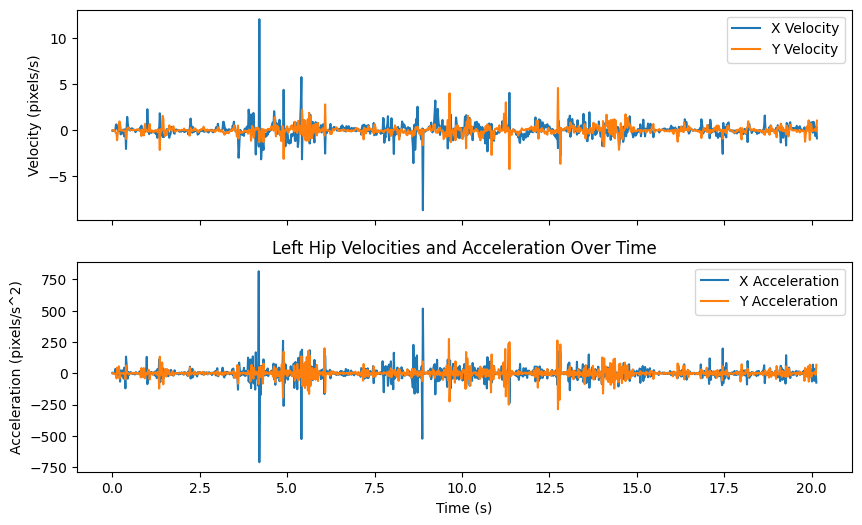

In [40]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Process the video and extract keypoints.
def extract_keypoints(input_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    keypoints = []

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Store the keypoints for later analysis.
            if results.pose_landmarks:
                keypoints.append(results.pose_landmarks)

    cap.release()

    return keypoints, fps

def calculate_velocity_acceleration(keypoints, fps, landmark):
    coordinates = np.array([(lm.x, lm.y) for frame in keypoints for lm in frame.landmark[landmark:landmark+1]])

    # Calculate the velocity.
    velocity = np.diff(coordinates, axis=0) * fps

    # Calculate the acceleration.
    acceleration = np.diff(velocity, axis=0) * fps

    return velocity, acceleration

def plot_velocity_acceleration(velocity, acceleration, fps, landmark):
    time = np.arange(0, len(velocity)) / fps

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    ax1.plot(time, velocity[:, 0], label="X Velocity")
    ax1.plot(time, velocity[:, 1], label="Y Velocity")
    ax1.set_ylabel("Velocity (pixels/s)")
    ax1.legend(loc="upper right")

    ax2.plot(time[:-1], acceleration[:, 0], label="X Acceleration")
    ax2.plot(time[:-1], acceleration[:, 1], label="Y Acceleration")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Acceleration (pixels/s^2)")
    ax2.legend(loc="upper right")
    plt.title(f"{landmark_definitions[landmark]} Velocities and Acceleration Over Time")
    plt.show()



input_video = "../data/raw/IMG_3301.mov" # Your input video file
landmark = 23 # Index of the right wrist landmark in MediaPipe Pose

keypoints, fps = extract_keypoints(input_video)
velocity, acceleration = calculate_velocity_acceleration(keypoints, fps, landmark)
plot_velocity_acceleration(velocity, acceleration, fps, landmark)


'Left Hip'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_heatmap(keypoints, landmark, frame_shape, bins=50):
    # Extract the (x, y) coordinates of the specified landmark from the keypoints.
    coordinates = np.array([(lm.x * frame_shape[1], (1 - lm.y) * frame_shape[0]) for frame in keypoints for lm in frame.landmark[landmark:landmark+1]])

    # Create a 2D histogram of the coordinates.
    heatmap, xedges, yedges = np.histogram2d(coordinates[:, 1], coordinates[:, 0], bins=bins)

    # Normalize the heatmap.
    heatmap /= np.max(heatmap)

    return heatmap



In [30]:
def plot_heatmap(heatmap,title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap='viridis', cbar_kws={'label': 'Frequency'})
    plt.gca().invert_yaxis()
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"{title}")
    plt.show()


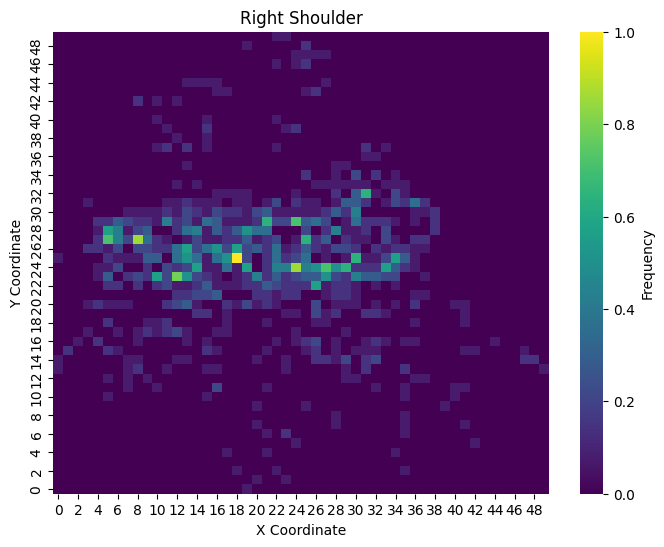

In [31]:
input_video = "../data/raw/IMG_3301.mov" # Your input video file
landmark = 12 # Index of the 

cap = cv2.VideoCapture(input_video)
frame_shape = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
cap.release()

keypoints, _ = extract_keypoints(input_video)
heatmap = create_heatmap(keypoints, landmark, frame_shape)
plot_heatmap(heatmap, "Right Shoulder")

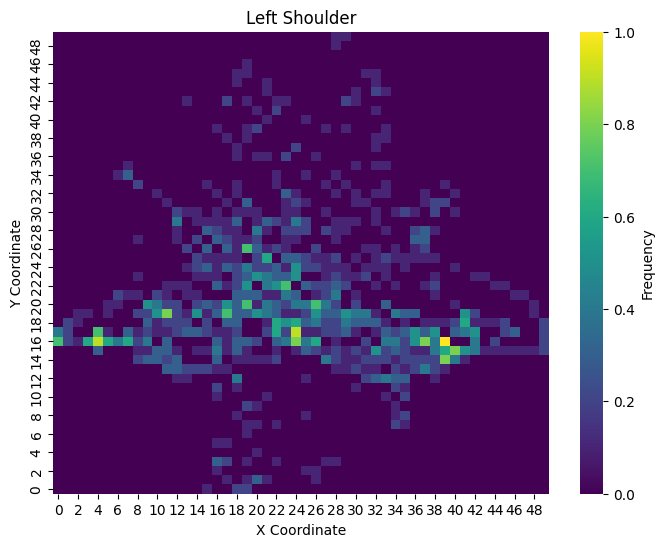

In [32]:
input_video = "../data/raw/IMG_3301.mov" # Your input video file
landmark = 11 # Index of the 

cap = cv2.VideoCapture(input_video)
frame_shape = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
cap.release()

keypoints, _ = extract_keypoints(input_video)
heatmap = create_heatmap(keypoints, landmark, frame_shape)
plot_heatmap(heatmap, "Left Shoulder")

In [37]:
landmark_definitions = {
    0: "Nose",
    1: "Left Eye Inner",
    2: "Left Eye",
    3: "Left Eye Outer",
    4: "Right Eye Inner",
    5: "Right Eye",
    6: "Right Eye Outer",
    7: "Left Ear",
    8: "Right Ear",
    9: "Mouth Left",
    10: "Mouth Right",
    11: "Left Shoulder",
    12: "Right Shoulder",
    13: "Left Elbow",
    14: "Right Elbow",
    15: "Left Wrist",
    16: "Right Wrist",
    17: "Left Pinky",
    18: "Right Pinky",
    19: "Left Index",
    20: "Right Index",
    21: "Left Thumb",
    22: "Right Thumb",
    23: "Left Hip",
    24: "Right Hip",
    25: "Left Knee",
    26: "Right Knee",
    27: "Left Ankle",
    28: "Right Ankle",
    29: "Left Heel",
    30: "Right Heel",
    31: "Left Foot Index",
    32: "Right Foot Index"
}


## On Image

In [17]:
# Load the image
folder = "../data/raw/"
image_path = f"{folder}DSC09032.JPG"

In [18]:
image_path

'../data/raw/DSC09032.JPG'

In [19]:

image = cv2.imread(image_path)


In [20]:

image = cv2.imread(image_path)
# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image using MediaPipe Pose
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        # Draw the landmarks and connections on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)


# Save the result
folder = "../data/processed/"
output_image_path = f"{folder}back_lever_angles.JPG"
cv2.imwrite(output_image_path, image)

# Display the result

In [21]:

#cv2.imshow("Pose Detection", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


True

In [28]:
import cv2
import mediapipe as mp
import numpy as np

def calculate_angle(a, b, c):
    a = np.array([a.x, a.y])
    b = np.array([b.x, b.y])
    c = np.array([c.x, c.y])

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


In [29]:

# Load the image
folder = "../data/raw/"
image_path = f"{folder}DSC09032.JPG"


In [35]:

image = cv2.imread(image_path)

if image is None:
    print("Image not loaded. Check the file path.")
    exit()

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        landmarks = results.pose_landmarks.landmark

        # Calculate angles
        left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW],
                                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST])
        left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW])
        left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                        landmarks[mp_pose.PoseLandmark.LEFT_KNEE],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ANKLE])
        left_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER],
                                        landmarks[mp_pose.PoseLandmark.LEFT_HIP],
                                        landmarks[mp_pose.PoseLandmark.LEFT_KNEE])

        # Display angles
        cv2.putText(image, str(int(round(left_elbow_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y], [image.shape[1], image.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, str(int(round(left_shoulder_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y], [image.shape[1], image.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, str(int(round(left_knee_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y], [image.shape[1], image.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, str(int(round(left_hip_angle, 0))), tuple(np.multiply([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y], [image.shape[1], image.shape[0]]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)



# Save the result
folder = "../data/processed/"
output_image_path = f"{folder}back_lever_angles.JPG"
cv2.imwrite(output_image_path, image)


True